In [54]:
%store -r modern_renewable_energy_consumption_df
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import modules.visualization.visualize as visual

/home/fenilenvinileno97/anaconda3/envs/final_project/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


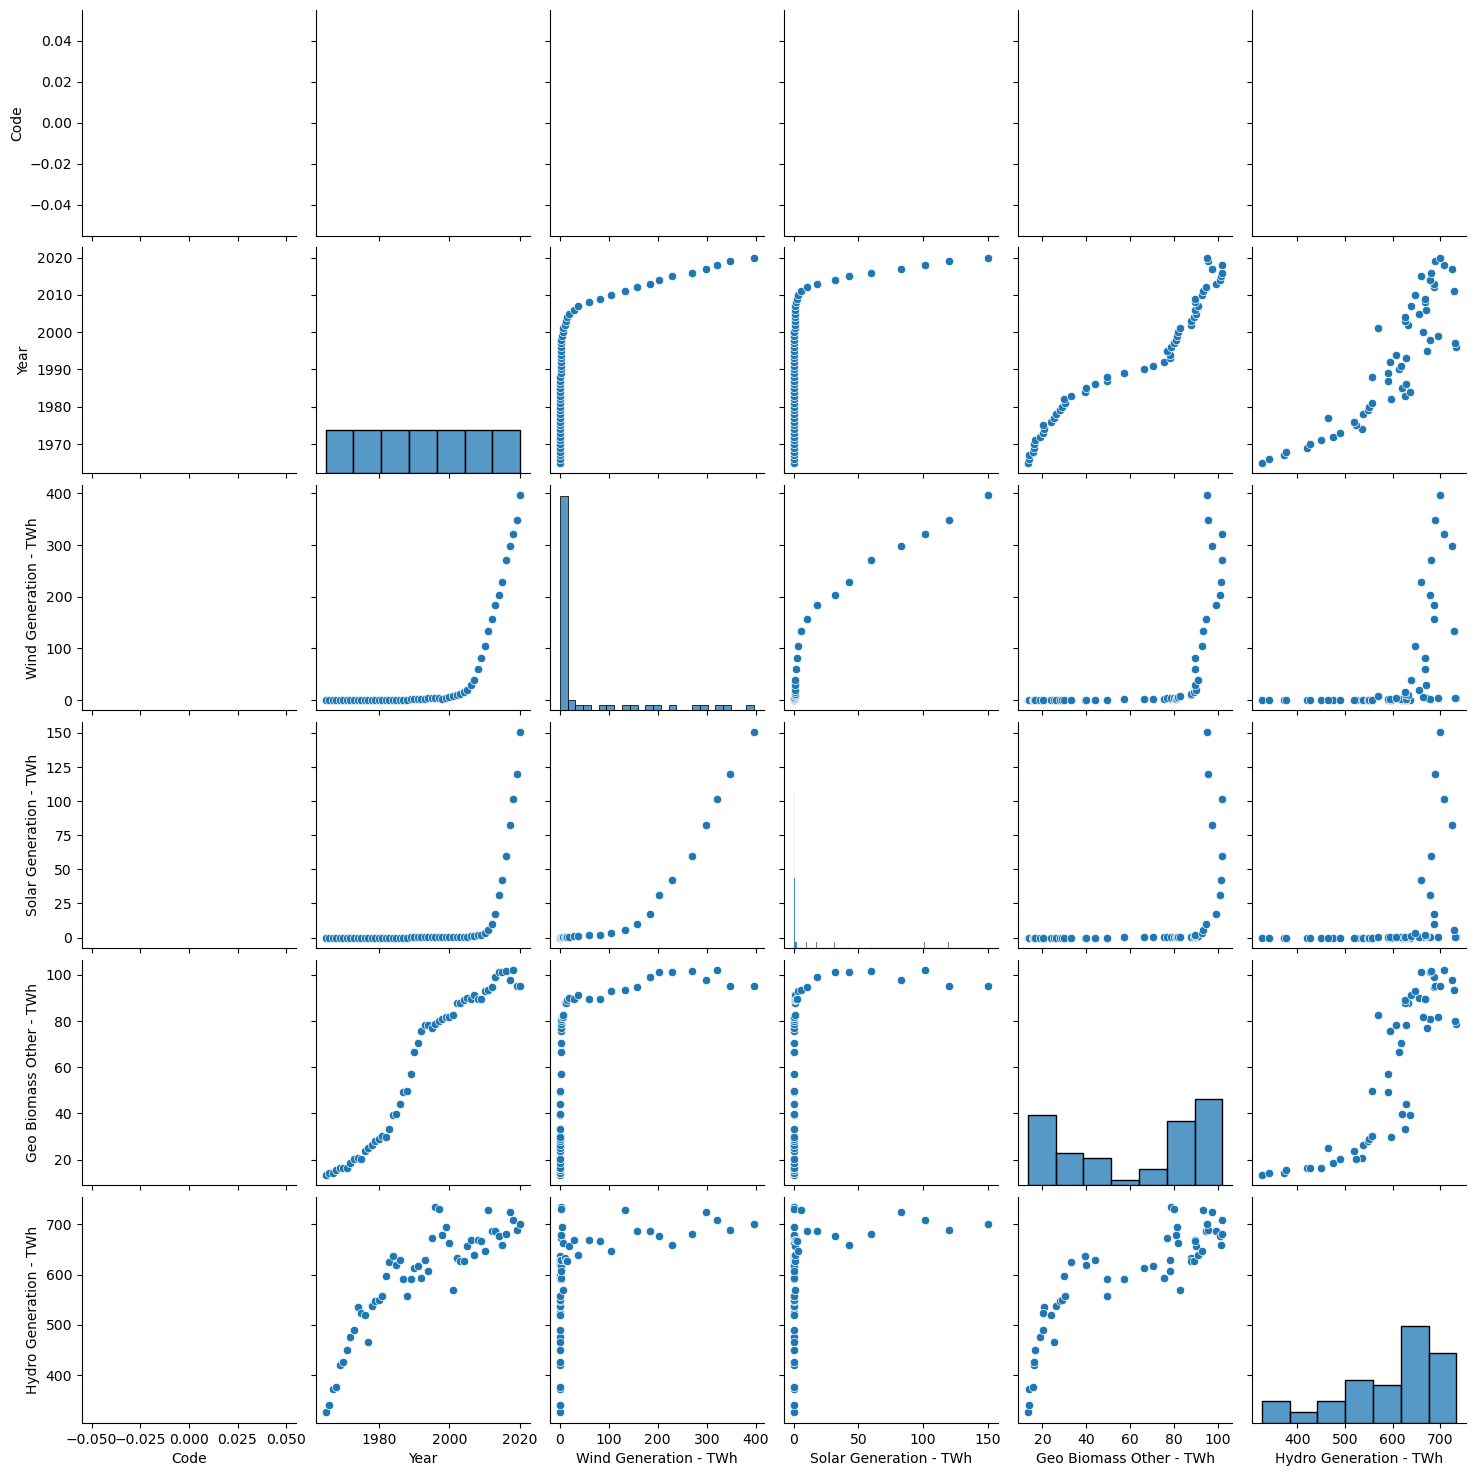

In [188]:
sns.pairplot(
        data=modern_renewable_energy_consumption_df[modern_renewable_energy_consumption_df.Entity=='North America']
)


In [140]:
filtered_df = modern_renewable_energy_consumption_df[modern_renewable_energy_consumption_df.Entity.isin(['Africa', 'Asia', 'Europe', 'North America', 'South & Central America', 'Asia Pacific'])].iloc[:, :4]
filtered_df = filtered_df.melt(id_vars={'Entity', 'Code', 'Year'})
filtered_df

,Entity,Code,Year,variable,value
0,Africa,NaN,1965,Wind Generation - TWh,0.000000
1,Africa,NaN,1966,Wind Generation - TWh,0.000000
2,Africa,NaN,1967,Wind Generation - TWh,0.000000
3,Africa,NaN,1968,Wind Generation - TWh,0.000000
4,Africa,NaN,1969,Wind Generation - TWh,0.000000
...,...,...,...,...,...
275,South & Central America,NaN,2016,Wind Generation - TWh,45.177003
276,South & Central America,NaN,2017,Wind Generation - TWh,56.131777
277,South & Central America,NaN,2018,Wind Generation - TWh,65.758987
278,South & Central America,NaN,2019,Wind Generation - TWh,78.764940


/home/fenilenvinileno97/anaconda3/envs/final_project/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_366/230043341.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


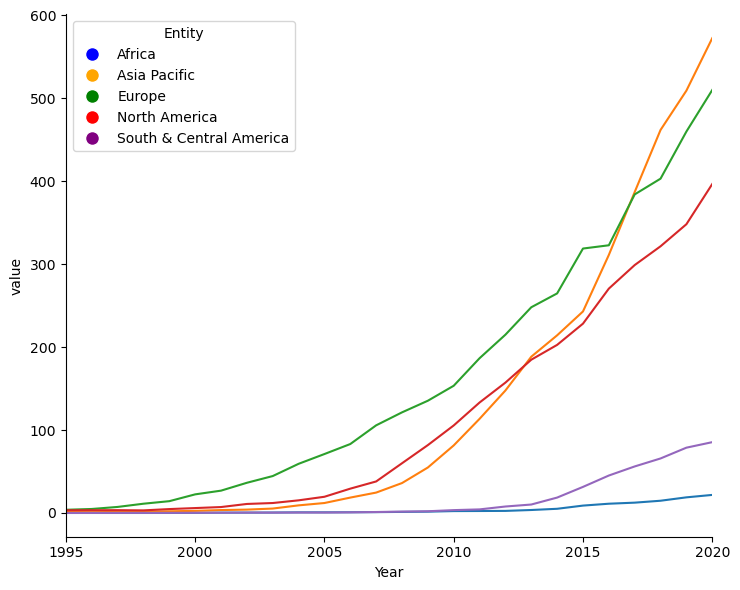

In [170]:
sns.relplot(
    data=filtered_df,
    y='value',
    x='Year',
    hue='Entity',
    kind='line',
    height=6,
    aspect=1.25,
    legend=False
)
# Define the labels and associated colors
legend_labels = filtered_df.Entity.unique()
legend_colors = ['blue', 'orange', 'green', 'red', 'purple']

# Create custom handles using color patches
custom_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10,
                             markerfacecolor=color) for label, color in zip(legend_labels, legend_colors)]

# Customize the legend
plt.legend(handles=custom_handles, title="Entity", loc="upper left")
plt.xlim(1995, 2020)
plt.tight_layout()
plt.show()

In [173]:
world_renewable = modern_renewable_energy_consumption_df[modern_renewable_energy_consumption_df.Entity == 'World'].melt(id_vars=['Year', 'Entity', 'Code'])
world_renewable

,Year,Entity,Code,variable,value
0,1965,World,OWID_WRL,Wind Generation - TWh,0.000000
1,1966,World,OWID_WRL,Wind Generation - TWh,0.000000
2,1967,World,OWID_WRL,Wind Generation - TWh,0.000000
3,1968,World,OWID_WRL,Wind Generation - TWh,0.000000
4,1969,World,OWID_WRL,Wind Generation - TWh,0.000000
...,...,...,...,...,...
219,2016,World,OWID_WRL,Hydro Generation - TWh,4018.671591
220,2017,World,OWID_WRL,Hydro Generation - TWh,4066.718275
221,2018,World,OWID_WRL,Hydro Generation - TWh,4176.687496
222,2019,World,OWID_WRL,Hydro Generation - TWh,4227.883280


/home/fenilenvinileno97/anaconda3/envs/final_project/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


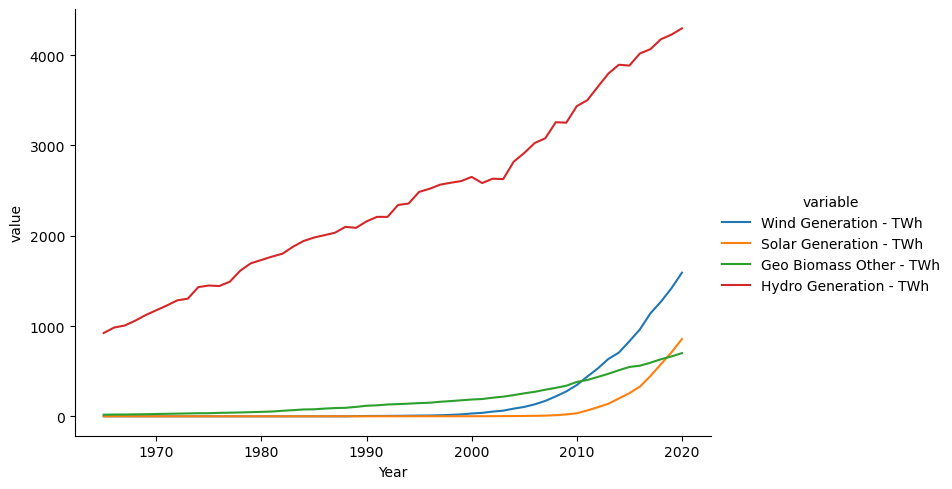

In [ ]:
sns.relplot(
    data=world_renewable,
    y='value',
    x='Year',
    aspect=1.5,
    kind='line',
    hue='variable'
)   
plt.show()

In [ ]:
modern_renewable_energy_consumption_df[modern_renewable_energy_consumption_df.Entity == 'World'].describe(include={np.number})

,Year,Wind Generation - TWh,Solar Generation - TWh,Geo Biomass Other - TWh,Hydro Generation - TWh
count,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1992.500000,198.953404,67.419339,197.801798,2399.518608
std,16.309506,394.350785,178.835864,192.132893,961.812245
min,1965.000000,0.000000,0.000000,17.985232,923.197924
25%,1978.750000,0.005250,0.000000,45.368866,1674.988827
50%,1992.500000,5.215390,0.530950,133.138801,2275.327598
75%,2006.250000,142.315067,6.228817,277.383317,3040.592846
max,2020.000000,1591.213512,855.724690,700.068651,4296.802045


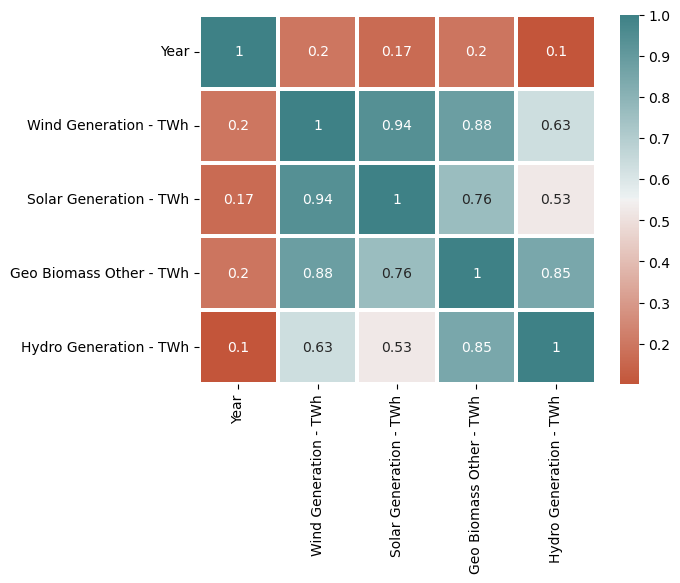

In [ ]:
visual.heatmap_corr(modern_renewable_energy_consumption_df)